In [4]:
import pyprob
import numpy as np
import ot
import torch
import cProfile
import pickle

from pyprob.dis import ModelDIS
from showerSim import invMass_ginkgo
from torch.utils.data import DataLoader
from pyprob.nn.dataset import OnlineDataset
from pyprob.util import InferenceEngine
from pyprob.util import to_tensor
from pyprob import Model
from pyprob.model import Parallel_Generator
import math
from pyprob.distributions import Normal
from pyprob.distributions.delta import Delta


import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as mpl_cm
plt.ion()

import sklearn as skl
from sklearn.linear_model import LinearRegression

from geomloss import SamplesLoss
sinkhorn = SamplesLoss(loss="sinkhorn", p=1, blur=.05)
def sinkhorn_t(x,y):
    x = to_tensor(x)
    y = torch.stack(y)
    return sinkhorn(x,y)

def ot_dist(x,y):
    # x = to_tensor(x)
    # y = torch.stack(y)
    x = np.array(x)
    y = np.array(torch.stack(y))
    a = ot.unif(len(x))
    b = ot.unif(len(y))
    Mat = ot.dist(x, y, metric='euclidean')
    #Mat1 /= Mat1.max()
    distance = to_tensor(ot.emd2(a,b,Mat))
    return distance

def leaf_dist(x,y):
    x_count = len(x)
    y_count = len(y)
    return torch.abs(x_count-y_count)


device = "cpu"

from pyprob.util import set_device
set_device(device)

# Plots

In [7]:
posteriors = []
for i in range(1,50):
    with open(f'../tests/network_parallel_6/LSTM_posterior_{i}', 'rb') as f:
        posterior = pickle.load(f)
    posteriors.append(posterior)

In [45]:
def posterior_results_weights(posterior):
    results = np.array([x.result['Lambda'] for x in posterior])
    weights = posterior.weights_numpy()
    return results, weights

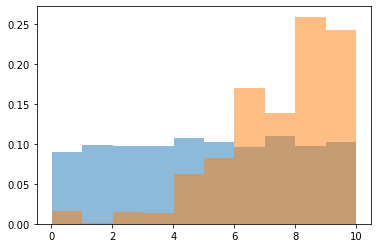

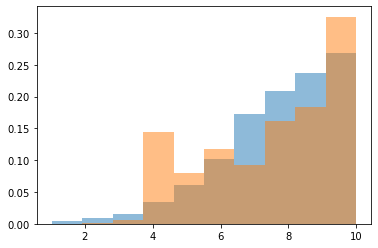

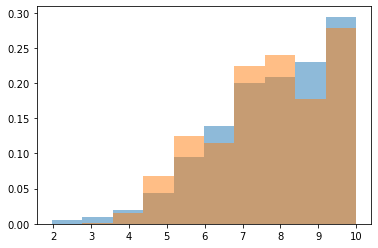

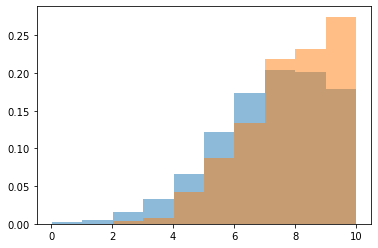

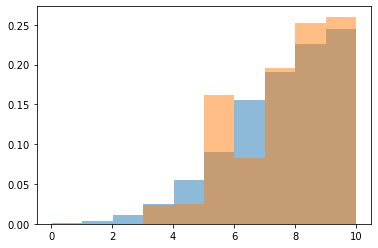

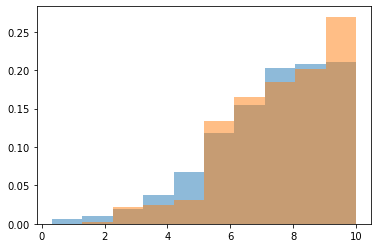

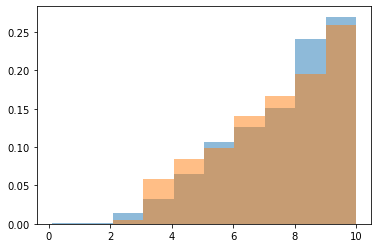

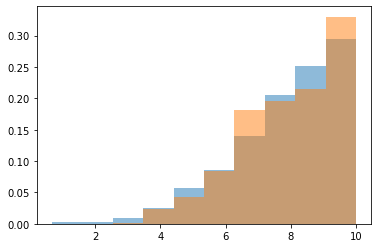

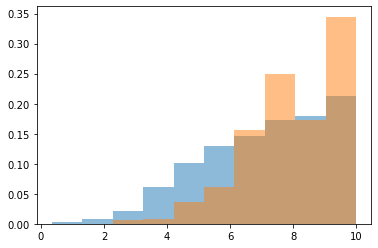

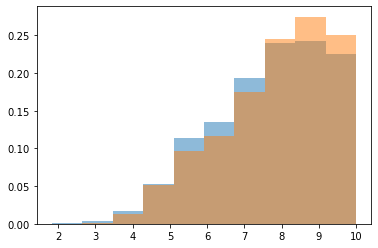

<Figure size 432x288 with 0 Axes>

In [46]:
for posterior in posteriors[0::5]:
    results, weights = posterior_results_weights(posterior)
    plt.hist(results,alpha=0.5, density = True)
    plt.hist(results,weights=weights, alpha=0.5, density = True)
    plt.figure()

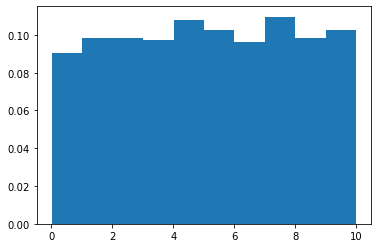

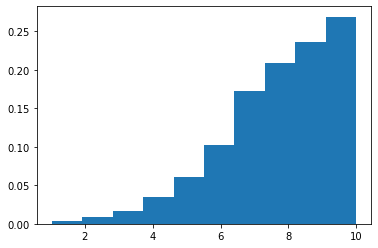

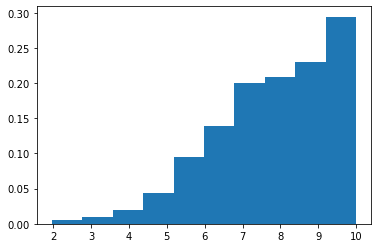

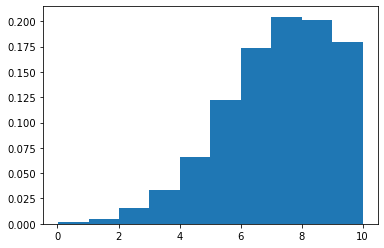

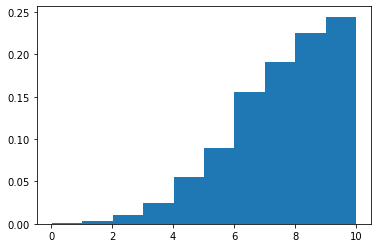

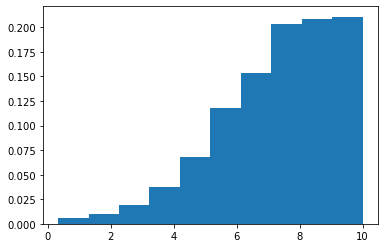

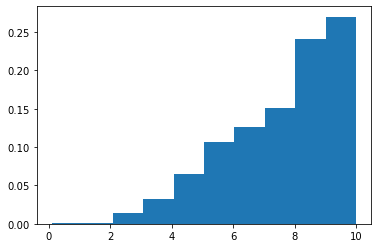

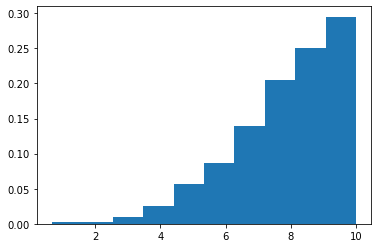

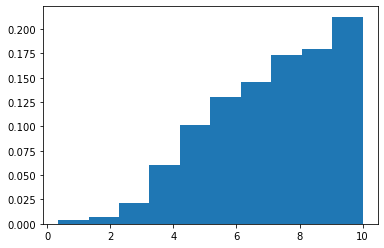

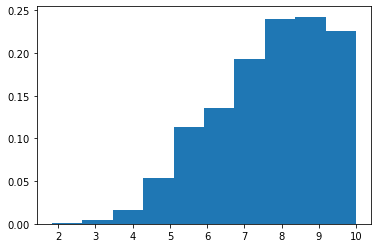

<Figure size 432x288 with 0 Axes>

In [30]:
for posterior in posteriors[0::5]:
    results, weights = posterior_results_weights(posterior)
    plt.hist(results,weights= weights, density = True)
    plt.figure()

In [47]:
def posterior_results_weights_root(posterior):
    results = np.array([x.result['LambdaRoot'] for x in posterior])
    weights = posterior.weights_numpy()
    return results, weights

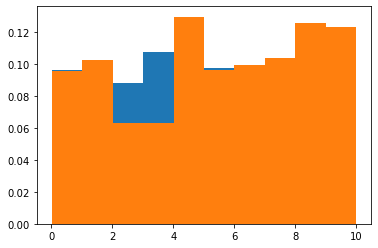

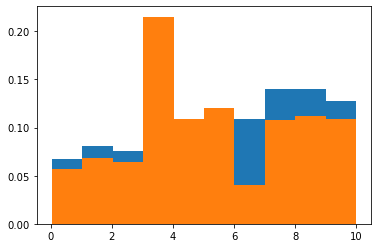

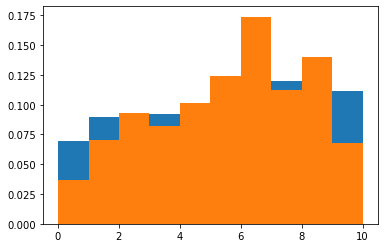

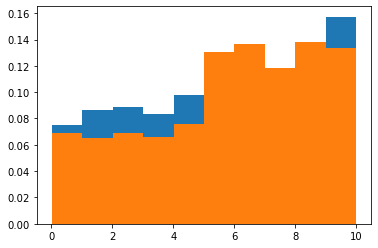

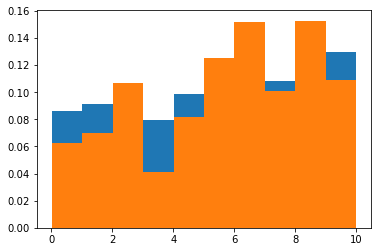

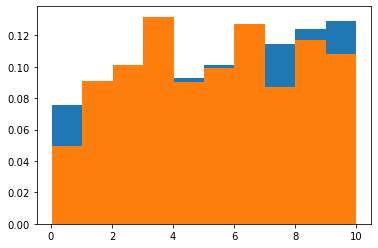

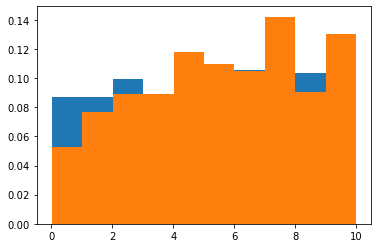

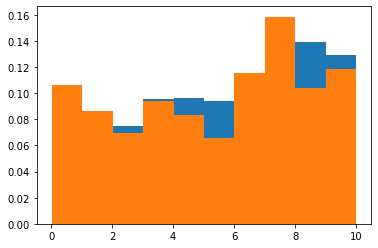

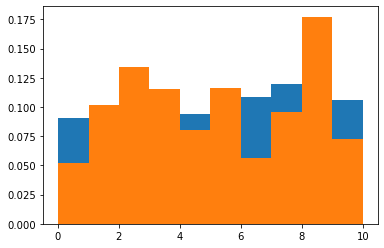

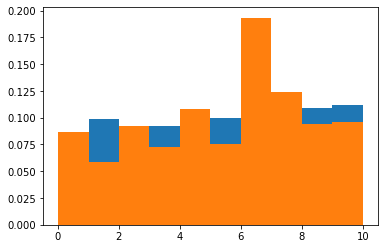

<Figure size 432x288 with 0 Axes>

In [49]:
for posterior in posteriors[0::5]:
    results, weights = posterior_results_weights_root(posterior)
    plt.hist(results, density=True)
    plt.hist(results, weights = weights, density = True)
    plt.figure()

In [44]:
posteriors[0].weights_numpy()

array([8.26454894e-10, 1.98574759e-05, 2.09077398e-30, ...,
       1.31140976e-15, 2.31415776e-15, 4.58667379e-05])